### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

Independent variable - Treatment of test (congruent/incongruent) <br>
Dependent variable - Time (taken to perform the test)

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

H<sub>0</sub>: There's no significant difference in performance time for the population to state the colors of the words in congruent or incongruent test. <br>
H<sub>1</sub>: There's significant difference in performance time for the population to state the colors of the words in congruent or incongruent test. <br>

H<sub>0</sub>: t<sub>cong</sub> = t<sub>incong</sub><br>
H<sub>1</sub>: t<sub>cong</sub> != t<sub>incong</sub>

<b>Notations:</b> <br>t<sub>cong</sub> - is the mean performance time for congruent test<br>
          t<sub>incong</sub> - is the mean performance time for incongruent test<br>
          H<sub>0</sub> - Null Hypothesis<br>
          H<sub>1</sub> - Alternative Hypothesis<br><br>

<li>Dependant two tailed t-test is used for statistical examination of two population means, for small sample sizes of data.</li>
<li>The sample data is only 24 records and we have the two population samples (time in seconds) for two tests congruent & incongruent.</li>
<li>And since each person takes both the test, so we choose to make a dependant t-test.</li>
<li>So an alternative hypothesis assumption of significant difference between two population means would result in a two-tailed t-test.
Which leads to null hypothesis assumption of two population means being equal.</li>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [2]:
# Perform the analysis here
import pandas as pd
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


<b>Mean time for 2 tests are:</b><br>
t<sub>cong</sub> = 14.05 (mean performance time for congruent test)<br>
t<sub>incong</sub> = 22.01 (mean performance time for incongruent test)<br>
<b>Standard deviation for 2 tests:</b><br>
std<sub>cong</sub> = 3.56 (standard deviation for congruent test)<br>
std<sub>incong</sub> = 4.80 (standard deviation for incongruent test)

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

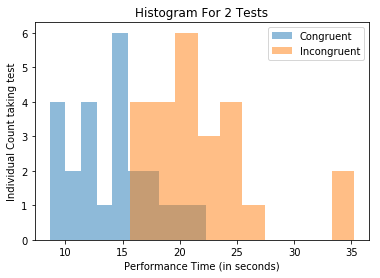

In [5]:
# Build the visualizations here
import matplotlib.pyplot as plt

plt.hist(df['Congruent'], alpha=0.5, label='Congruent')
plt.hist(df['Incongruent'], alpha=0.5, label='Incongruent')
plt.legend(loc='upper right')
plt.title('Histogram For 2 Tests')
plt.xlabel('Performance Time (in seconds)')
plt.ylabel('Individual Count taking test')
plt.show();

Histogram shows the spread of data and intersection of two tests. It clearly indicates that the performance time for incongruent test is much higher than than the performance time for congruent test. The minimum and maximum points for two test are far away from each other.

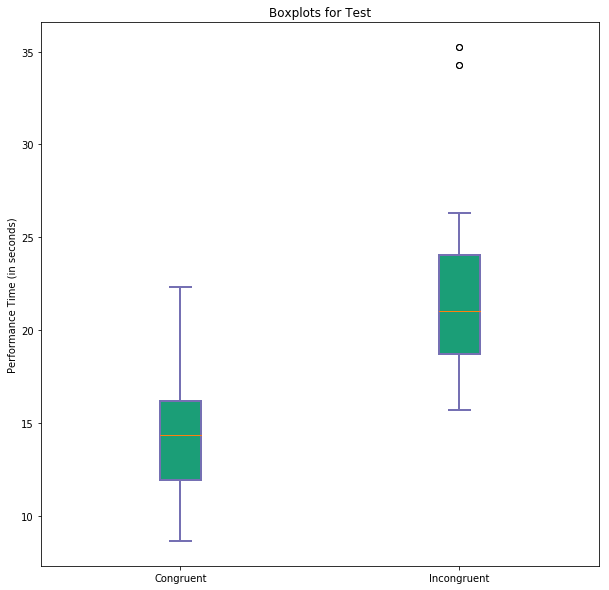

In [6]:
# Reference code for Boxplot http://blog.bharatbhole.com/creating-boxplots-with-matplotlib/
data_to_plot = [df['Congruent'], df['Incongruent']]
fig = plt.figure(1, figsize=(10,10))
ax = fig.add_subplot(111)
bp = ax.boxplot(data_to_plot)

## to get fill color
bp = ax.boxplot(data_to_plot, patch_artist=True)
## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )
## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

ax.set_title('Boxplots for Test')
ax.set_xticklabels(['Congruent', 'Incongruent'])
ax.set_ylabel('Performance Time (in seconds)')
fig.savefig('fig1.png', bbox_inches='tight')

<li>Boxplot for 2 tests give a wider picture of the values like minimum, maximum, median, quartile and inter-quartile.</li>
<li>The minimum value for Incongruent Test is higher than the median value of congruent test.</li>
<li>The range of congruent test is greater than the range of incongruent test, but the inter-quartile range of incongruent test is greater than the congruent test.</li>
<br><b>Looking at the boxplot, we reject the null hypothesis in favor of alternative hypothesis.</b>

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# Perform the statistical test here
import scipy.stats as stats
stats.ttest_rel(df['Congruent'], df['Incongruent'])

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

Will use the default standard threshhold error rate of 0.05(5%) for dataset.<br>
This is two-tailed test, the p-value of 4.1030005857111781e-08 = 0.00138.<br>
<b>p-value < 0.05, which suggest that we reject the null hypothesis in favor of alternative hypothesis.</b>

## We Reject the null hypothesis in favor of alternative hypothesis which states that the performance time mean for two test are not equal.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

Reference for Stroop effect details: https://en.wikipedia.org/wiki/Stroop_effect#Experimental_findings <br>
<b><i>Mind reads the words faster than analysing a color of the word.</i></b>